# Статистический анализ судейства в хастле

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

## Анализ результатов

#### Загрузим данные по крестам

In [2]:
raw_crosses = pd.read_csv(
    'dataset/crosses.csv', 
    names=["competitor_id", "competition_id", "judge_name", "category", "phase", "passed"],
    dtype={
        "competitor_id": str,
    }
).\
    dropna() # смотрим только на зарегистрированных спортсменов

raw_crosses.competitor_id = raw_crosses.competitor_id.astype(int)

In [3]:
# выдадим спортсменам синтетический инкрементные идентификаторы

id_map = {}
i = 0
for id in raw_crosses.competitor_id:
    if id not in id_map:
        id_map[id] = i
        i += 1
    
raw_crosses['syntethic_competitor_id'] = [id_map[id] for id in raw_crosses.competitor_id]

In [4]:
# также дадим спортсменам турнирные идентификторы

raw_crosses['unique_id'] = raw_crosses.competitor_id.astype(str) + raw_crosses.competition_id + raw_crosses.category

In [5]:
raw_crosses.head()

,competitor_id,competition_id,judge_name,category,phase,passed,syntethic_competitor_id,unique_id
0,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner
1,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner
2,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner
3,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner
4,10486,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1,1,10486NORD CUP 2020_2020-03-13dnd beginner


#### Загрузим данные по местам

In [6]:
raw_places = pd.read_csv(
    'dataset/results.csv', 
    names=["competitor_id", "category", "competition_id", "total_competitors", "place_low", "place_high"],
    dtype={
        "competitor_id": str,
    }
).dropna() # смотрим только на зарегистрированных спортсменов

raw_places = raw_places[raw_places.competitor_id != "дебют"]

raw_places.competitor_id = raw_places.competitor_id.astype(int)

raw_places['place'] = (raw_places.place_low + raw_places.place_high) / 2.

In [7]:
raw_places.head()

,competitor_id,category,competition_id,total_competitors,place_low,place_high,place
0,11220,dnd beginner,NORD CUP 2020_2020-03-13,52,1,1,1.0
1,8082,dnd beginner,NORD CUP 2020_2020-03-13,52,2,2,2.0
2,11190,dnd beginner,NORD CUP 2020_2020-03-13,52,3,3,3.0
3,10311,dnd beginner,NORD CUP 2020_2020-03-13,52,4,4,4.0
4,1650,dnd beginner,NORD CUP 2020_2020-03-13,52,5,5,5.0


#### Помержим места и кресты

In [8]:
results = raw_crosses.merge(raw_places, on=["competitor_id", "category", "competition_id"])
results.head()

,competitor_id,competition_id,judge_name,category,phase,passed,syntethic_competitor_id,unique_id,total_competitors,place_low,place_high,place
0,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
1,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
2,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
3,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
4,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,8,1,0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5


#### Посмотрим, сколько оценок поставил каждый судья и получил каждый спортсмен

In [9]:
judge_cross_counts = results.judge_name.value_counts()
judge_cross_counts.name = "judge_cross_counts"
judge_cross_counts

екатерина николаева    4195
кудрявцев михаил       3630
катунин павел          3117
лебедев сергей         2935
мавлатов юрий          2148
дубровин игорь         2077
волконский иван        1683
александр милованов    1631
арутюнян евгений       1345
ирина кудрявцева       1256
вероника лебедева      1002
анастасия лукьянова     886
дутчак татьяна          885
андрей коньков          868
елена цветкова          564
александра луценко      509
ирина пузанова          477
александр макарчук      413
роман самохвалов        336
алексей карпунин        314
алексей евдокимов       241
иван могучих            114
анна болотина           114
степочкина яна           90
казакова олеся           90
азиатцева ольга          90
гриненко никита          79
гиря дмитрий             78
александр резчиков       78
мария стрельченко        43
алексей северин          43
виталий ермаков          35
александр иентш          35
Name: judge_cross_counts, dtype: int64

#### Будем рассматривать только судей, которые поставили больше или равное количество оценок с Коньковым

In [10]:
results = results.join(judge_cross_counts, on="judge_name")
results = results[results.judge_cross_counts > 800]
# results = results[results.judge_cross_counts > 2000]

In [11]:
results.drop(columns=["judge_cross_counts"], inplace=True)
results.head()

,competitor_id,competition_id,judge_name,category,phase,passed,syntethic_competitor_id,unique_id,total_competitors,place_low,place_high,place
0,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
1,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
2,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
3,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
4,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,8,1,0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5


#### Также уберем всех спортсменов, у которых меньше 10 оценок 

In [12]:
cross_counts = results.competitor_id.value_counts()
cross_counts.name = "cross_counts"

results = results.join(cross_counts, on="competitor_id")
results = results[results.cross_counts >= 10]
results = results.drop(columns=["cross_counts"])

results.head()

,competitor_id,competition_id,judge_name,category,phase,passed,syntethic_competitor_id,unique_id,total_competitors,place_low,place_high,place
0,10655,NORD CUP 2020_2020-03-13,ирина кудрявцева,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
1,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
2,10655,NORD CUP 2020_2020-03-13,лебедев сергей,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
3,10655,NORD CUP 2020_2020-03-13,александр милованов,dnd beginner,16,1,0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5
4,10655,NORD CUP 2020_2020-03-13,кудрявцев михаил,dnd beginner,8,1,0,10655NORD CUP 2020_2020-03-13dnd beginner,52,19,22,20.5


### Первичный анализ

#### Посмотрим, кого судьи крестят, а кого - не крестят 

In [13]:
total_cross_labels = ["syntethic_competitor_id", "judge_name", "passed"]
total_crosses = results[total_cross_labels]

total_crosses.head()

,syntethic_competitor_id,judge_name,passed
0,0,ирина кудрявцева,1
1,0,кудрявцев михаил,1
2,0,лебедев сергей,1
3,0,александр милованов,1
4,0,кудрявцев михаил,1


In [14]:
def get_judge_dataframes():
    return total_crosses[total_crosses.passed == 1], total_crosses[total_crosses.passed == 0]

In [15]:
passed, not_passed = get_judge_dataframes()

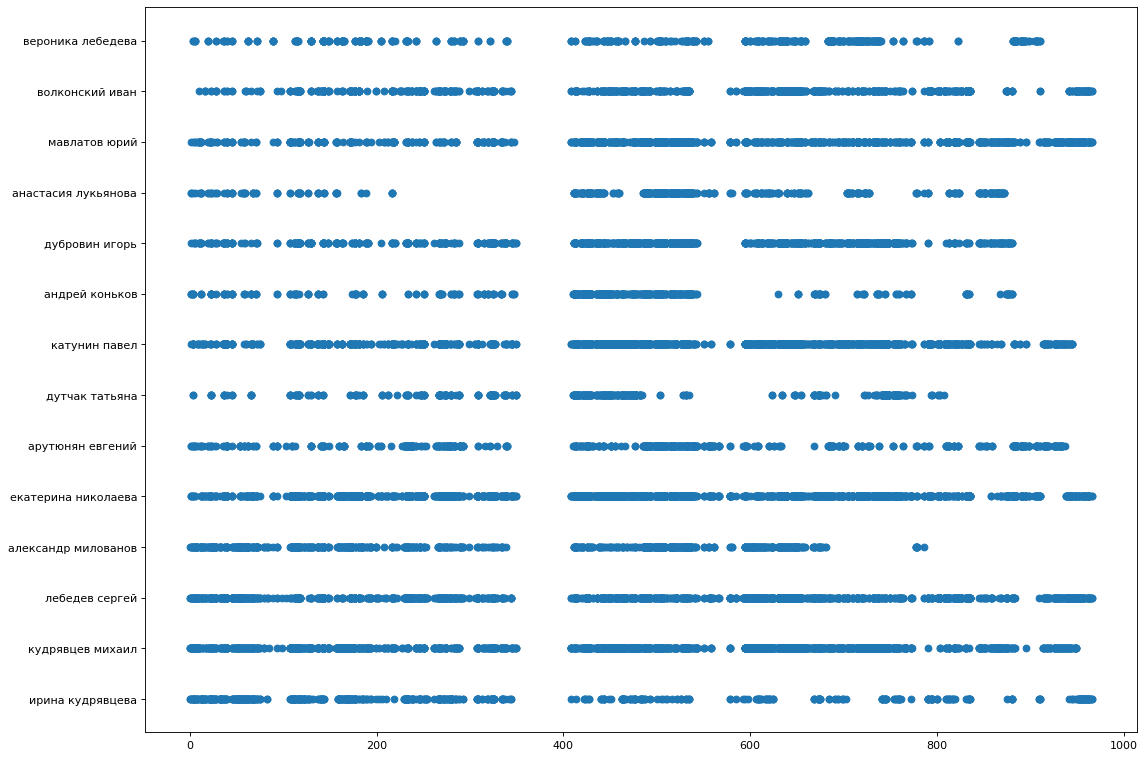

In [16]:
plt.figure(figsize=(16, 12), dpi=80)
plt.scatter(passed.syntethic_competitor_id, passed.judge_name)

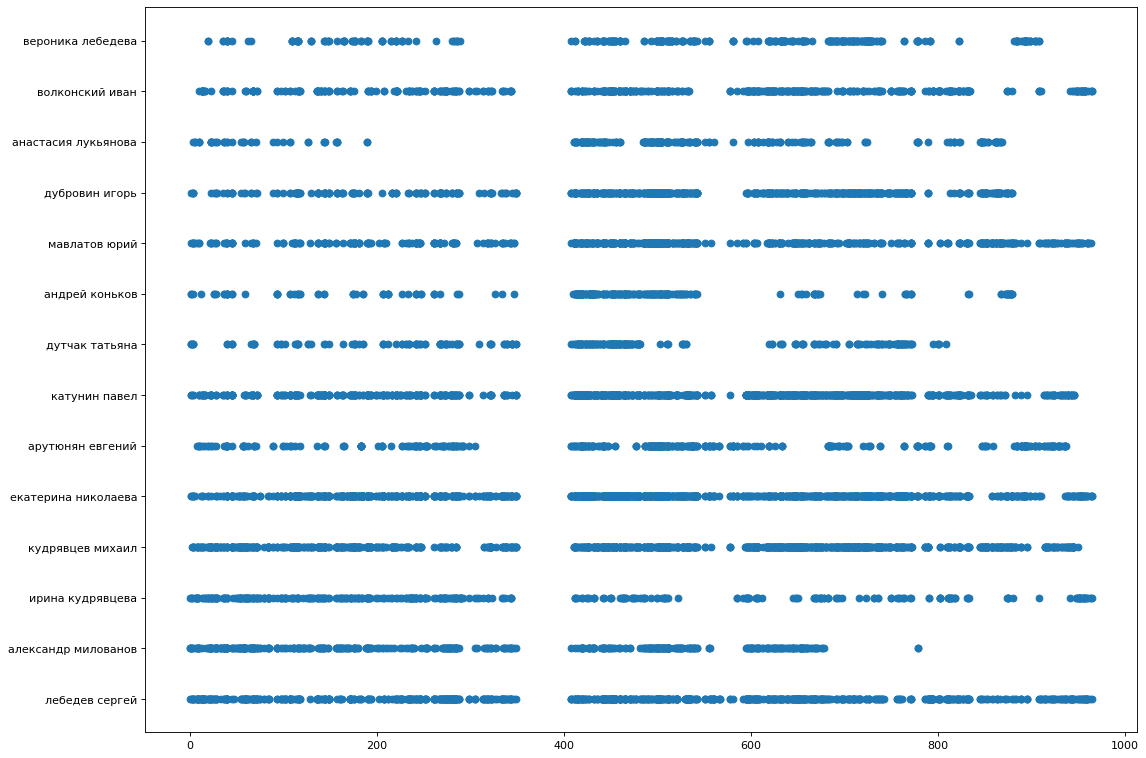

In [17]:
plt.figure(figsize=(16, 12), dpi=80)
plt.scatter(not_passed.syntethic_competitor_id, not_passed.judge_name)

## Построение модели

### Построим линейную регрессию количества крестов, полученных на турнире на отношение места участника к суммарному числу участников

#### Для этого подготовим исходные данные. Сначала получим места спортсменов

In [18]:
y_columns = ["competitor_id", "competition_id", "category", "place"]

y = results[y_columns].\
    groupby(y_columns[:-1]).\
    first().place

y.shape

(2776,)

#### Получим вектора оценок, которые спортсменам давали судьи

#### Сначала посчитаем, сколько положительных и сколько отрицательных оценок от каждого судьи на каждом этапе получил каждый участник

In [19]:
def make_source_data():
    data_columns = ["unique_id", "judge_name", "passed"]
    data = results[data_columns].groupby(data_columns).size().reset_index(name='counts')

    competitors = results[["unique_id", "total_competitors"]].groupby(["unique_id"]).first().reset_index()
    return data.merge(competitors, on="unique_id")

In [20]:
def make_judge_mapping():    
    all_judges = results.judge_name.unique()

    judge_mapping = {}
    cnt = 0
    judge_mapping_columns = []
    for judge in all_judges:
        for passed in [0, 1]:
            judge_mapping[(judge, passed)] = cnt
            judge_mapping_columns.append(judge + "_" + str(passed))
            cnt += 1
            
    return judge_mapping, judge_mapping_columns
        

In [21]:
def make_data():
    judge_mapping, judge_mapping_columns = make_judge_mapping()
    source_data = make_source_data()
    
    all_records = []

    make_record = lambda: [0] * (len(judge_mapping) + 2)

    curr_id = None
    curr_record = make_record()
    for id, judge_name, passed, counts, total_competitors in zip(
                source_data["unique_id"],
                source_data["judge_name"], 
                source_data["passed"], 
                source_data["counts"],
                source_data["total_competitors"]
            ):
        if curr_id is None:
            curr_id = id

        if id != curr_id:
            all_records.append(curr_record)
            curr_record = make_record()
            curr_id = id

        curr_record[judge_mapping[(judge_name, passed)]] = counts
        curr_record[len(judge_mapping)] = total_competitors
        curr_record[len(judge_mapping) + 1] = id

    all_records.append(curr_record)

    data = pd.DataFrame(all_records, columns=judge_mapping_columns + ["total_competitors", "unique_id"])
    return data

#### Добавим сюда же итоговые места спортсменов

In [22]:
def make_place_data():
    return results[["unique_id", "place"]].\
        groupby("unique_id").\
        first().reset_index()

#### Соберем полный массив данных

In [23]:
def make_total_data():
    x_data = make_data()
    y_data = make_place_data()
    
    return x_data.merge(y_data, on="unique_id").drop(columns=["unique_id"])

make_total_data().head()

,ирина кудрявцева_0,ирина кудрявцева_1,кудрявцев михаил_0,кудрявцев михаил_1,лебедев сергей_0,лебедев сергей_1,александр милованов_0,александр милованов_1,екатерина николаева_0,екатерина николаева_1,арутюнян евгений_0,арутюнян евгений_1,дутчак татьяна_0,дутчак татьяна_1,катунин павел_0,катунин павел_1,андрей коньков_0,андрей коньков_1,дубровин игорь_0,дубровин игорь_1,анастасия лукьянова_0,анастасия лукьянова_1,мавлатов юрий_0,мавлатов юрий_1,волконский иван_0,волконский иван_1,вероника лебедева_0,вероника лебедева_1,total_competitors,place
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,25,22.5
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,18,13.5
2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,4,0,0,27,3.0
3,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,2,0,0,1,1,0,0,0,0,0,0,0,0,49,25.5
4,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,25,21.5


#### Построим линейную регрессию

In [24]:
# Сначала построю на всех данных

from sklearn.linear_model import LinearRegression

data = make_total_data()
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

reg = LinearRegression().fit(X, y)

In [25]:
reg.score(X, y)

0.7895147144977421

## Интерпретация построенной модели

In [31]:
def get_sorted_coefs():
#     tuples = sorted(list(zip(reg.coef_, data.columns[:-1])), key=lambda tup: tup[0], reverse=True)
    tuples = list(zip(reg.coef_, data.columns[:-1]))
    
    coefs = [tup[0] for tup in tuples]
    labels = [tup[1] for tup in tuples]
    
    return coefs, labels

In [32]:
def get_explaination():
    return pd.DataFrame.from_records([reg.coef_ / max(reg.coef_)], columns=data.columns[:-1])

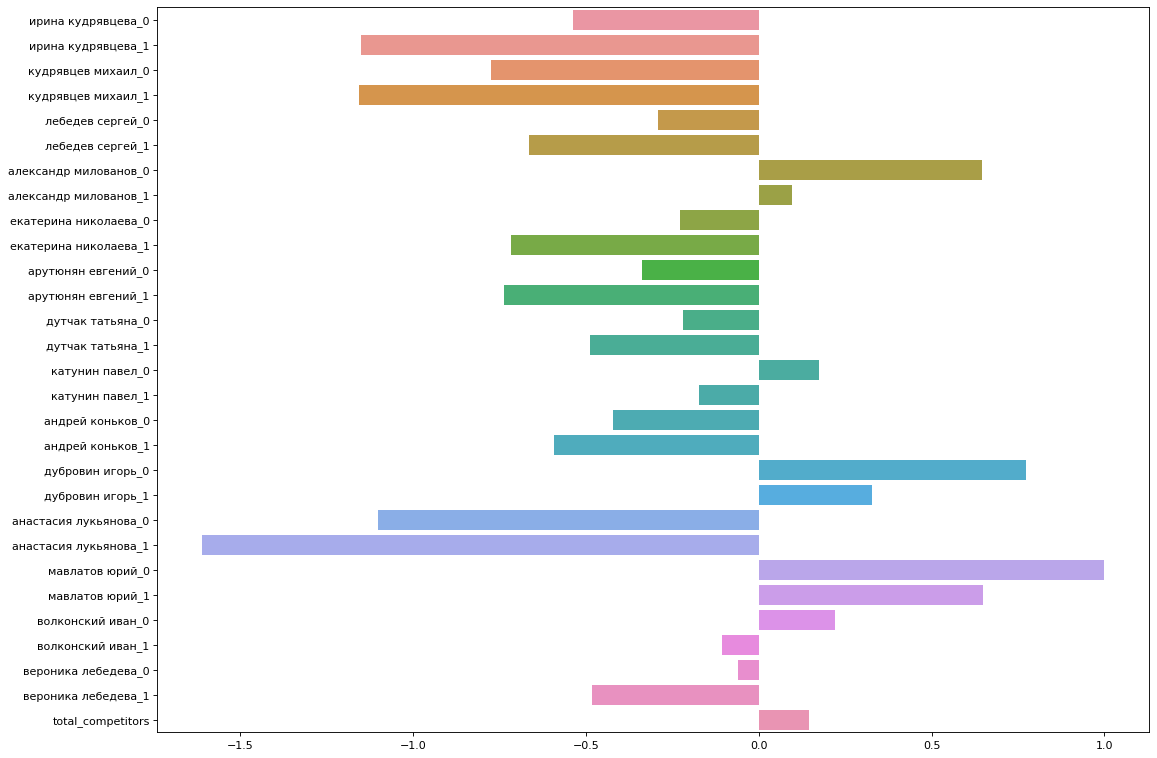

In [33]:
coefs, labels = get_sorted_coefs()

import seaborn as sns

plt.figure(figsize=(16, 12), dpi=80)
ax = sns.barplot(data=get_explaination()[labels], orient="h")


In [29]:
get_explaination()

,ирина кудрявцева_0,ирина кудрявцева_1,кудрявцев михаил_0,кудрявцев михаил_1,лебедев сергей_0,лебедев сергей_1,александр милованов_0,александр милованов_1,екатерина николаева_0,екатерина николаева_1,арутюнян евгений_0,арутюнян евгений_1,дутчак татьяна_0,дутчак татьяна_1,катунин павел_0,катунин павел_1,андрей коньков_0,андрей коньков_1,дубровин игорь_0,дубровин игорь_1,анастасия лукьянова_0,анастасия лукьянова_1,мавлатов юрий_0,мавлатов юрий_1,волконский иван_0,волконский иван_1,вероника лебедева_0,вероника лебедева_1,total_competitors
0,-0.538367,-1.151896,-0.774899,-1.155706,-0.290329,-0.66598,0.645091,0.095054,-0.227713,-0.716485,-0.338004,-0.737556,-0.220171,-0.487957,0.175524,-0.172472,-0.422239,-0.59383,0.772339,0.328292,-1.102879,-1.609947,1.0,0.649879,0.2198,-0.107402,-0.060466,-0.483899,0.145375


In [30]:
abs(reg.coef_) / max(abs(reg.coef_))

array([0.33440052, 0.71548673, 0.48131982, 0.71785371, 0.18033447,
       0.41366562, 0.40069066, 0.05904148, 0.14144128, 0.44503656,
       0.2099471 , 0.45812458, 0.13675659, 0.30308861, 0.10902454,
       0.10712878, 0.26226903, 0.36885054, 0.47972971, 0.20391471,
       0.68504062, 1.        , 0.62113854, 0.40366482, 0.1365263 ,
       0.06671121, 0.0375576 , 0.30056843, 0.09029827])